In [218]:
import sys 
import os 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))

In [219]:
from pyserrf.serrf import SERRF

In [220]:
df=pd.read_table("../tests/SERRF_example_dataset.tsv")
df

,batch,sampleType,time,label,1_ISTD Ceramide (d18:1/17:0) [M+HCOO]-,1_ISTD CUDA [M-H]-,1_ISTD FA (16:0)-d3 [M-H]-,1_ISTD LPC (17:0) [M+HCOO]-,1_ISTD LPE (17:1) [M-H]-,1_ISTD PC (12:0/13:0) [M+HCOO]-,1_ISTD PE (17:0/17:0) [M-H]-,1_ISTD PG (17:0/17:0) [M-H]-,1_ISTD SM (d18:1/17:0) [M+HCOO]-,Cer (d32:1) [M+HCOO]-,Cer (d34:0) [M+HCOO]-,Cer (d34:1) [M+HCOO]-,Cer (d34:2) [M+HCOO]-,Cer (d36:1) [M+HCOO]-,Cer (d38:1) [M+HCOO]-,Cer (d39:1) [M+HCOO]-,Cer (d40:1) [M+HCOO]-,Cer (d40:2) [M+HCOO]-,Cer (d41:1) [M+HCOO]-,Cer (d42:1) [M+HCOO]-,Cer (d42:2) A [M+HCOO]-,Cer (d42:2) B [M+HCOO]-,Cer (d43:1) [M+HCOO]-,Cer (d44:1) [M+HCOO]-,FA (16:0) [M-H]-,FA (16:1) [M-H]-,FA (18:0) [M-H]-,FA (18:1) [M-H]-,FA (18:2) [M-H]-,FA (20:4) [M-H]-,FA (22:4) [M-H]-,GlcCer (d34:1) [M+HCOO]-,GlcCer (d38:1) [M+HCOO]-,GlcCer (d40:1) [M+HCOO]-,GlcCer (d41:1) [M+HCOO]-,GlcCer (d42:1) [M+HCOO]-,...,CSH_negESI #366,CSH_negESI #374,CSH_negESI #375,CSH_negESI #376,CSH_negESI #377,CSH_negESI #378,CSH_negESI #379,CSH_negESI #380,CSH_negESI #381,CSH_negESI #382,CSH_negESI #384,CSH_negESI #385,CSH_negESI #386,CSH_negESI #386.1,CSH_negESI #387,CSH_negESI #388,CSH_negESI #389,CSH_negESI #390,CSH_negESI #391,CSH_negESI #392,CSH_negESI #393,CSH_negESI #394,CSH_negESI #395,CSH_negESI #396,CSH_negESI #397,CSH_negESI #400,CSH_negESI #401,CSH_negESI #500,CSH_negESI #501,CSH_negESI #502,CSH_negESI #503,CSH_negESI #504,CSH_negESI #505,CSH_negESI #506,CSH_negESI #507,CSH_negESI #508,CSH_negESI #509,CSH_negESI #510,CSH_negESI #511,CSH_negESI #512
0,A,qc,1,QC000,167879,75578.0,71916.0,43222,33727.0,2602,59101.0,381682,17674,301.0,432.0,2740.0,363,843,875,665,4349.0,679.0,4187.0,18214.0,2569.0,3632,844,844,12778,120,13762.0,4687.0,1831,1297.0,1367,3136.0,584,3013,1547.0,3841.0,...,541,1350.0,7396,4554.0,1150,1267,815.0,1064,1134,979,1344,702.0,6492,1585,1337.0,4857.0,551,1323.0,1072.0,498,1200.0,705,4046.0,1962,778,494.0,3280,1696,33450,3415.0,4770.0,589.0,7549.0,16914.0,12393.0,1261.0,2435.0,2084,4505.0,6048
1,A,sample,2,sample01,185671,76273.5,65979.5,40703,31388.5,2624,64815.5,377114,17257,440.5,515.5,3556.5,459,1321,1106,707,5950.5,1279.5,5079.5,19340.5,3807.5,5375,1201,830,9615,66,9802.5,5956.5,1089,391.5,1233,2891.5,602,3483,1695.5,4532.5,...,530,1857.5,4383,6215.5,1286,1579,808.5,986,774,807,1536,675.5,8589,958,1307.5,4560.5,400,953.5,1053.5,488,1248.5,747,4443.5,1862,941,488.5,3294,2089,36351,4580.5,6027.5,523.5,8769.5,18140.5,13789.5,1919.5,3799.5,2746,4900.5,6043
2,A,sample,3,GB001617,158256,76082.0,66125.0,36637,29950.0,2244,62752.0,341337,17257,339.0,331.0,3056.0,423,1177,943,629,3769.0,339.0,3639.0,9578.0,2329.0,3826,1182,509,7368,177,5152.0,12039.0,2512,433.0,1256,2177.0,659,3090,1514.0,3180.0,...,549,1183.0,3931,3712.0,825,1362,806.0,572,379,874,1126,745.0,7743,79,1677.0,4128.0,464,807.0,1008.0,480,911.0,508,2545.0,2053,534,447.0,2095,3132,30842,4092.0,5624.0,381.0,7187.0,15545.0,10871.0,1329.0,2819.0,1810,4775.0,5060
3,A,sample,4,GB001333,164492,74334.0,68269.0,42339,32090.0,2396,72544.0,313383,17447,530.0,427.0,4423.0,641,1521,959,699,4202.0,458.0,4510.0,12592.0,3445.0,5687,1374,644,9444,87,4512.0,17620.0,6187,698.0,1155,3064.0,509,2470,1439.0,2745.0,...,547,1267.0,4612,4797.0,1226,1860,736.0,782,62,932,942,611.0,8593,60,2182.0,3900.0,395,681.0,884.0,556,796.0,625,3489.0,2459,551,681.0,2706,3383,28651,3973.0,6215.0,374.0,5612.0,13501.0,9330.0,2293.0,5151.0,3443,16860.0,5880
4,A,sample,5,GB001191,155000,74702.0,64161.0,38337,31444.0,2217,61625.0,342638,16526,334.0,427.0,3103.0,404,1338,1160,821,5908.0,773.0,5444.0,17029.0,2840.0,3994,1374,857,8327,271,4846.0,8966.0,2697,317.0,1265,2771.0,643,3897,2133.0,4096.0,...,339,1929.0,4517,6712.0,1281,1545,710.0,414,622,699,1141,683.0,6474,1275,1350.0,4588.0,504,828.0,853.0,470,1264.0,641,4133.0,1320,867,442.0,2802,1694,30407,4032.0,4883.0,481.0,6650.0,16304.0,11749.0,2011.0,3978.0,2640,5615.0,6938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [221]:
a=SERRF(other_columns=['label'], threads=4)
norm = a.fit_transform(df)

python(29606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(29609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 268/268 [00:58<00:00,  4.60it/s]


In [222]:
norm

,sampleType,batch,time,label,1_ISTD Ceramide (d18:1/17:0) [M+HCOO]-,1_ISTD CUDA [M-H]-,1_ISTD FA (16:0)-d3 [M-H]-,1_ISTD LPC (17:0) [M+HCOO]-,1_ISTD LPE (17:1) [M-H]-,1_ISTD PC (12:0/13:0) [M+HCOO]-,1_ISTD PE (17:0/17:0) [M-H]-,1_ISTD PG (17:0/17:0) [M-H]-,1_ISTD SM (d18:1/17:0) [M+HCOO]-,Cer (d32:1) [M+HCOO]-,Cer (d34:0) [M+HCOO]-,Cer (d34:1) [M+HCOO]-,Cer (d34:2) [M+HCOO]-,Cer (d36:1) [M+HCOO]-,Cer (d38:1) [M+HCOO]-,Cer (d39:1) [M+HCOO]-,Cer (d40:1) [M+HCOO]-,Cer (d40:2) [M+HCOO]-,Cer (d41:1) [M+HCOO]-,Cer (d42:1) [M+HCOO]-,Cer (d42:2) A [M+HCOO]-,Cer (d42:2) B [M+HCOO]-,Cer (d43:1) [M+HCOO]-,Cer (d44:1) [M+HCOO]-,FA (16:0) [M-H]-,FA (16:1) [M-H]-,FA (18:0) [M-H]-,FA (18:1) [M-H]-,FA (18:2) [M-H]-,FA (20:4) [M-H]-,FA (22:4) [M-H]-,GlcCer (d34:1) [M+HCOO]-,GlcCer (d38:1) [M+HCOO]-,GlcCer (d40:1) [M+HCOO]-,GlcCer (d41:1) [M+HCOO]-,GlcCer (d42:1) [M+HCOO]-,...,CSH_negESI #366,CSH_negESI #374,CSH_negESI #375,CSH_negESI #376,CSH_negESI #377,CSH_negESI #378,CSH_negESI #379,CSH_negESI #380,CSH_negESI #381,CSH_negESI #382,CSH_negESI #384,CSH_negESI #385,CSH_negESI #386,CSH_negESI #386.1,CSH_negESI #387,CSH_negESI #388,CSH_negESI #389,CSH_negESI #390,CSH_negESI #391,CSH_negESI #392,CSH_negESI #393,CSH_negESI #394,CSH_negESI #395,CSH_negESI #396,CSH_negESI #397,CSH_negESI #400,CSH_negESI #401,CSH_negESI #500,CSH_negESI #501,CSH_negESI #502,CSH_negESI #503,CSH_negESI #504,CSH_negESI #505,CSH_negESI #506,CSH_negESI #507,CSH_negESI #508,CSH_negESI #509,CSH_negESI #510,CSH_negESI #511,CSH_negESI #512
0,qc,A,1,QC000,189603.001511,77074.111003,58390.373451,39548.701620,30472.107255,2395.877445,65045.875728,394057.710605,17383.465759,367.586754,513.147393,3326.135454,407.180009,1096.597662,1056.749024,682.021497,5179.515950,864.099498,4941.174955,20652.872293,3023.801421,4322.200920,933.101703,932.467332,9160.817939,134.108396,12261.948617,4159.442358,1720.299035,1012.774464,835.867136,3178.712892,563.152429,3176.274732,1578.703740,4015.536038,...,408.112623,1573.069675,7637.606622,5006.194747,2096.727682,1437.695030,672.333380,776.163583,591.084597,944.735250,1344.307850,592.070305,4671.968164,1278.025218,886.075460,5179.604304,299.367106,1486.909424,3080.479062,308.538450,1225.178211,636.522790,3989.973232,1598.457379,798.069207,614.134059,3919.729585,1432.954007,28239.210876,2759.377965,3583.181039,672.489142,6559.300746,13409.973050,10332.403187,960.040445,1748.106311,1382.687044,3317.232894,6416.641228
1,sample,A,2,sample01,206639.320350,79052.078867,65844.132540,36831.052700,30384.913654,2538.224178,67857.990425,396826.172610,16309.517304,470.729891,581.375012,4039.568977,475.007753,1597.471239,1303.714341,762.564451,6781.382066,1489.183569,5586.117234,22237.265964,4305.892775,6016.667608,1257.705364,890.811021,8245.190713,81.890565,8352.307887,5613.997995,1381.691074,430.289635,1005.071773,2693.226218,571.308676,3264.503333,1590.400034,4249.006603,...,428.198902,2283.460604,4978.828759,7182.790807,2642.060759,2008.188341,756.902388,815.873931,744.103940,919.330933,1633.356733,682.879594,5962.256863,965.809992,966.889608,5164.078184,268.949548,1083.263816,3064.450520,313.824803,1409.314009,686.115517,4816.163553,1658.696066,941.561171,589.645153,3553.735488,1898.409860,29353.243428,3725.560634,4135.975809,616.288316,6759.919773,13715.441647,10552.378100,1303.505200,2813.049684,1807.038353,3570.032427,8011.616241
2,sample,A,3,GB001617,182792.765704,80641.074103,70138.777779,36571.039926,31275.548732,2188.319609,66673.149042,371239.456570,16594.535010,364.898249,347.544423,3499.579405,441.940726,1430.010285,1127.669004,680.283551,4535.874107,408.854604,4070.942215,11120.844740,2692.966169,4409.772967,1267.561181,550.801173,7128.121901,211.114631,6323.349757,11620.515215,3318.743099,532.720819,1002.891773,2153.222257,649.971863,3204.333311,1489.358968,3187.972892,...,446.302859,1467.622889,4395.232665,4293.947186,1779.128034,1713.063354,868.070574,523.863651,419.872028,1028.608715,1216.128936,751.314572,5543.518075,103.978269,1249.785999,

<Axes: xlabel='PC1', ylabel='PC2'>

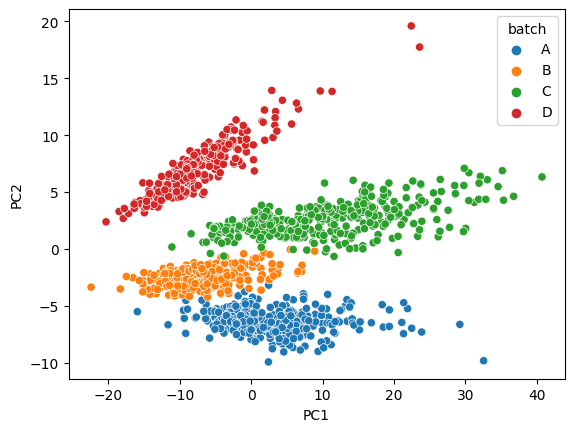

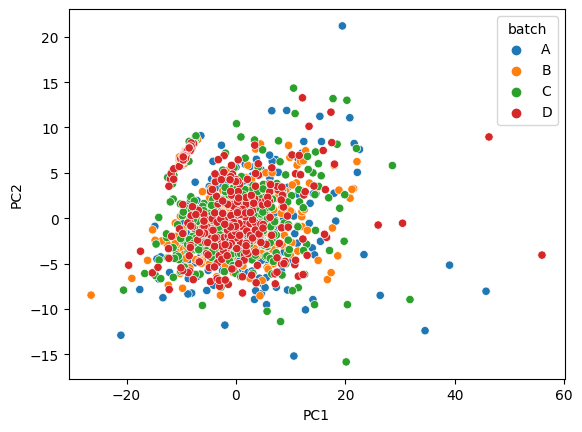

In [223]:
from sklearn.decomposition import PCA
import seaborn as sns

df = df.set_index("label")
batch = df.batch
sample_type = df.sampleType
pca_df = df.iloc[:,3:]
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(StandardScaler().fit_transform(pca_df)),columns=["PC1","PC2"],index=pca_df.index)
pca_df['batch'] = batch
pca_df['sample_type'] = sample_type

plt.figure()
sns.scatterplot(pca_df,x="PC1",y="PC2",hue="batch")


norm = norm.set_index("label")
batch = norm.batch 
sample_type = norm.sampleType 
pca_norm = norm.iloc[:,3:]
pca_norm = pd.DataFrame(pca.fit_transform(StandardScaler().fit_transform(pca_norm)),columns=["PC1","PC2"],index=pca_norm.index)
pca_norm['batch'] = batch
pca_norm['sample_type'] = sample_type

plt.figure()
sns.scatterplot(pca_norm,x="PC1",y="PC2",hue='batch') 

In [182]:
D = pd.read_csv("2-peak_area_after_filling_missing_values.csv").drop(columns=["position","mz","rt"])
D.set_index("name",inplace=True)
D = D.T

In [ ]:
M = pd.read_csv("sample_metadata_all_batches.csv").set_index("sample_name")
df = pd.merge(M[["batch","sample_type","injection_order"]],D,right_index=True,left_index=True)
df.rename(columns={"sample_type":"sampleType","injection_order":"time"},inplace=True)
#df.to_csv("./my_test_data.csv")

In [207]:
df = pd.read_csv("./my_test_data.csv").rename(columns={"Unnamed: 0":"label"})

In [208]:
df.loc[df[df["sampleType"] != "sp"].index,"sampleType"] = "sample"
df.loc[df[df["sampleType"] == "sp"].index,"sampleType"] = "qc"


In [212]:
df.to_csv("./my_test_data.csv")

In [214]:
df

,label,batch,sampleType,time,#1 254.0588@6.4752 MS1+,#2 149.0229@14.0755 MS1+,#3 116.0705@0.7164 MS1+,#4 172.1330@4.8790 MS1+,#5 279.1583@14.0764 MS1+,#6 391.2833@16.9305 MS1+,#7 307.1107@7.5515 MS1+,#8 496.3391@15.7004 MS1+,#9 144.1017@0.7538 MS1+,#10 353.2652@16.2165 MS1+,#11 166.0861@3.3765 MS1+,#12 118.0861@0.9283 MS1+,#13 132.1018@1.9561 MS1+,#14 321.1324@9.3772 MS1+,#15 114.0660@0.6595 MS1+,#16 381.2965@16.7232 MS1+,#17 172.0714@3.9341 MS1+,#18 132.1017@1.8029 MS1+,#19 181.0491@14.0756 MS1+,#20 163.0388@14.0764 MS1+,#21 132.0765@0.6937 MS1+,#22 296.0692@7.7237 MS1+,#23 520.3392@15.4742 MS1+,#24 265.1179@5.7044 MS1+,#25 205.0970@4.4637 MS1+,#26 524.3705@16.2945 MS1+,#27 182.0809@1.5975 MS1+,#28 297.1664@11.6977 MS1+,#29 522.3549@15.8803 MS1+,#30 188.0703@4.4644 MS1+,#31 331.2833@16.2165 MS1+,#32 291.1445@5.5135 MS1+,#33 301.1400@14.0762 MS1+,#34 180.0652@5.4627 MS1+,#35 167.0853@11.9341 MS1+,#36 258.1095@0.6265 MS1+,...,#13892 223.0571@4.0897 MS1+,#13893 132.0653@6.7914 MS1+,#13894 213.2208@2.7598 MS1+,#13895 161.1320@2.8093 MS1+,#13896 106.0860@2.7723 MS1+,#13897 112.0754@2.4548 MS1+,#13898 138.0523@4.0160 MS1+,#13899 158.0961@6.8981 MS1+,#13900 215.0673@9.7960 MS1+,#13901 210.1119@3.0136 MS1+,#13902 156.9971@4.6588 MS1+,#13903 213.1844@2.8828 MS1+,#13904 163.0022@6.5439 MS1+,#13905 91.4316@3.7786 MS1+,#13906 185.1895@2.5338 MS1+,#13907 354.9807@5.5855 MS1+,#13908 124.0366@2.8745 MS1+,#13909 603.2915@8.2388 MS1+,#13910 116.9630@4.5999 MS1+,#13911 118.9815@4.1068 MS1+,#13912 111.0550@7.0941 MS1+,#13913 177.1270@7.7169 MS1+,#13914 294.0535@7.2965 MS1+,#13915 263.1481@6.1911 MS1+,#13916 131.0337@5.2573 MS1+,#13917 117.9344@3.8933 MS1+,#13918 172.9515@2.1351 MS1+,#13919 111.0414@2.9314 MS1+,#13920 117.1019@2.5713 MS1+,#13921 88.0215@2.9125 MS1+,#13922 88.0215@3.6843 MS1+,#13923 316.1205@5.8643 MS1+,#13924 129.0179@2.5261 MS1+,#13925 445.1620@8.3665 MS1+,#13926 113.0207@8.2863 MS1+,#13927 102.9891@2.2719 MS1+,#13928 162.9684@2.5492 MS1+,#13929 104.9479@2.4696 MS1+,#13930 134.9680@5.0733 MS1+,#13931 102.9891@3.6210 MS1+
0,AOU_B_001,1,sample,1,44.0,910004.0,86244.0,44.0,44.0,1138521.0,44.0,80515.0,2269.0,25762414.0,16199.0,252332.0,21601.0,44.0,13826.0,14374473.0,44.0,14924.0,271828.0,190196.0,1641.0,44.0,44.0,44.0,1833.0,39323.0,10604.0,7554.0,14853.0,1916.0,3050952.0,44.0,44.0,1272.0,44.0,44.0,...,44.0,788.0,1333.0,729.0,2415.0,44.0,44.0,872.0,1662.0,2337.0,1603.0,2777.0,1098.0,44.0,1080.0,44.0,44.0,44.0,2350.0,944.0,664.0,774.0,44.0,44.0,44.0,1997.0,1715.0,44.0,903.0,44.0,44.0,44.0,44.0,44.0,44.0,3668.0,44.0,727.0,1621.0,1212.0
1,AOU_NIST_001,1,sample,2,44.0,1395975.0,60327104.0,519074.0,616369.0,5562699.0,44.0,108192632.0,7092270.0,105404568.0,94516456.0,108265208.0,124034552.0,44.0,6985123.0,102243176.0,44.0,44.0,421043.0,266285.0,8104846.0,44.0,85614376.0,1350079.0,56645800.0,50561048.0,48079480.0,4580.0,53121976.0,45630704.0,26386294.0,44.0,1518451.0,1312864.0,2166558.0,24097544.0,...,44.0,894.0,2091.0,939.0,2335.0,44.0,1790.0,1932.0,44.0,2918.0,2269.0,2272.0,1986.0,44.0,1568.0,2078.0,1501.0,44.0,3778.0,1295.0,44.0,964.0,44.0,44.0,44.0,1717.0,4730.0,44.0,4100.0,44.0,740.0,44.0,692.0,44.0,747.0,5204.0,44.0,883.0,2116.0,2391.0
2,AOU_HHEAR_P1_001,1,sample,3,44.0,420824128.0,62026848.0,44.0,265105584.0,157149936.0,44.0,103357584.0,9560276.0,132152808.0,107687800.0,117354616.0,143260656.0,44.0,7647836.0,90508208.0,7108.0,79937136.0,131050408.0,110649536.0,11393849.0,44.0,40023072.0,760650.0,59403316.0,44515836.0,61553712.0,2493.0,28630902.0,46108108.0,45325624.0,44.0,122168944.0,1397232.0,667202.0,16853488.0,...,590.0,2859.0,1301.0,44.0,2067.0,44.0,44.0,1431.0,2833.0,3147.0,44.0,44.0,44.0,44.0,44.0,44.0,2364.0,44.0,4332.0,1274.0,893.0,830.0,44.0,44.0,44.0,44.0,44.0,44.0,1000.0,1369.0,2489.0,44.0,1513.0,44.0,2098.0,44.0,44.0,1531.0,44.0,3302.0
3,AOU_SP_001,1,qc,4,4633218.0,1161562.0,56210872.0,14166810.0,505266.0,1362634.0,453177.0,119620536.0,9588226.0,130074648.0,100840224.0,118584624.0,128992824.0,891308.0,8433816.0,9933886

In [210]:
a=SERRF(other_columns=["label"],threads=4)
a.fit_transform(df)

  1%|          | 76/13931 [38:51<118:03:36, 30.68s/it]


KeyboardInterrupt: 